# Lesson 10: Reduced Dynamical Neuron Models

Last week we discussed dynamical systems theory for 1-D and 2-D systems. We learned about the following key concepts:

- state variables, parameters, differential equations
- stable and unstable equilibria
- topological equivalence and local linearization
- limit cycles and saddle equilibria
- bifurcations

We'll conclude our investigation of 2-D systems with a discussion of a bifurcation that's not found in 1-D systems, and then look at some simple 2-D neuron models that can recapitulate many of the behaviors of more complex, realistic models.

### Additional resources

Many of the figures in this notebook are from Chapters 4 and 8 in *Dynamical systems in neuroscience*, by Eugene Izhikevich (2006).

To see some really cool visualizations of dynamical systems, check out this [video textbook](https://www.youtube.com/watch?v=fufF25O4vD8&list=PL8erL0pXF3JZqdlYIfTTyibOqSqwzRdVV&index=1) by Robert Ghrist.

## Bifurcations in 2-D systems

Just as we saw in 1-D dynamical systems, when an equilibrium has one or more zero-valued eigenvalues, it indicates that the system may be undergoing a **bifurcation**: a qualitative shift in dynamics caused by the loss or gain of equilibria.

2-D systems can bifurcate in all the ways that 1-D systems can - saddle nodes, pitchforks, etc - but also in new and more exciting ways.

### Heteroclinic orbits

As a refresher, here's our simple persistent sodium + potassium model:

\begin{align}
C_\mathrm{m} \dot{V} & = g_L(E_L - V) + \overline{g}_\mathrm{Na}m_\infty(V)(E_\mathrm{Na} - V) + \overline{g}_\mathrm{K}n(E_\mathrm{K} - V) + I_e \\
\dot{n} & = \frac{n_\infty(V) - n}{\tau_n(V)} \\
\end{align}

When the injected current is low, there are three equilibria: a node, a saddle, and an unstable focus. The saddle and node are connected by **heteroclinic orbits**:

<img src="images/l12_i4.26.png" alt="heteroclinic orbits" style="width: 400px;"/>

This system will always wind up back at the stable node. Why?

### Homoclinic orbits

It's also possible, though rare, for an orbit to loop back on the unstable equilibrium where it started. For example, with slightly higher $I_\mathrm{e}$:

<img src="images/l12_i4.27.png" alt="homoclinic orbit" style="width: 400px;"/>

If we increase $I_\mathrm{e}$ further, we get a *saddle homoclinic orbit* bifurcation. We won't go into detail on this kind of bifurcation, but more can be found in Chapter 6 of Izhikevich (2006).

## Saddle-node bifurcation

What happens as the two equilibria get closer together? The stable node and saddle will eventually meet, forming a *saddle-node equilibrium*:

<img src="images/l12_i4.28.png" alt="saddle-node equilibrium" style="width: 400px;"/>

Further increase of $I_\mathrm{e}$ causes this equilibrium to disappear, forming a limit cycle around the unstable focus:

<img src="images/l12_i4.30.png" alt="limit cycle" style="width: 400px;"/>

Hopefully this reminds you of the 1-D saddle-node bifurcation!

### Saddle-node spiking

If we apply a ramp current to this model, we will pass through the bifurcation, and the system will abruptly transition from rest to spiking:

<img src="images/l12_i4.29.png" alt="saddle-node spiking" style="width: 500px;"/>

### Attractor ruins

In the phase plane, this transition looks like this:

<img src="images/l12_i4.31.png" alt="saddle-node spiking phase plane" style="width: 500px;"/>

Just like the 1-D case, the 2-D saddle-node bifurcation leaves *attractor ruins* where the system moves slowly. As a consequence, a system undergoing saddle-node bifurcation can spike very slowly around the rheobase. This is called **Type I excitability**.

### Saddle-node bifurcation diagram

The saddle-node bifurcation diagram for this system looks a lot like the 1-D system:

<img src="images/l12_i4.32.png" alt="saddle-node bifurcation diagram" style="width: 500px;"/>

To generate this plot, we can simply replace the state-variable $n$ with its steady-state value and solve for the points where $\dot{V} = 0$:

$$
0 = g_L(E_L - V) + \overline{g}_\mathrm{Na}m_\infty(V)(E_\mathrm{Na} - V) + \overline{g}_\mathrm{K}n_\infty(V)(E_\mathrm{K} - V) + I_e
$$

## Hopf Bifurcation

Our model can undergo a different kind of bifurcation if we change the threshold of the potassium current, such that the $n$-nullcline only intersects with the $V$-nullcline at a single point. When $I_\mathrm{e}$ is low, this equilibrium is a *stable focus*:

<img src="images/l12_i4.34a.png" alt="low-threshold stable focus" style="width: 300px;"/>

As the injected current increases, however, the system starts to oscillate around the equilibrium:

<img src="images/l12_i4.34b.png" alt="low-threshold bifurcation" style="width: 300px;"/>


### Hopf-bifurcation spiking

If we apply a ramp current to the low-threshold K model, we see a very different transition to spiking:

<img src="images/l12_i4.33.png" alt="Hopf spiking" style="width: 500px;"/>

Note that the period of the spiking remains relatively constant, even though the amplitude increases.

### Bifurcation plot

Hopf bifurcations are not as easy to find, because the equilibrium does not appear or disappear. We have to simulate the model or determine when the real component of the Jacobian eigenvalues changes sign.

<img src="images/l12_i4.35.png" alt="Hopf spiking" style="width: 500px;"/>

### Bifurcation and excitability types

Because the Hopf bifurcation is characterized by a relative constant firing frequency, with no attractor ruins, a neuron that exhibits this kind of dynamics exhibits a discontinuous f-I plot, or **Type II excitability** (right):

<img src="images/l12_excitability.png" alt="type I and type II firing" style="width: 500px;"/>

## Simple Neuron Models

One take-away from our dive into dynamical systems theory is that we don't necessarily need to model every detail of neuron biophysics.

Instead, we might be able to approximate many aspects of neural behavior using models with only a few state variables.

This would have significant advantages for the explanatory power of the models and for parameter inference.

## Integrate-and-Fire

Let's start with one of the simplest models, which represents neurons as a ohmic leak current and a spike threshold:

<img src="images/l12_i8.1.png" alt="LIF model" style="width: 400px;"/>

The membrane dynamics are identical to our passive model:

$$
C_\mathrm{m}\dot{V} = I_\mathrm{e} + g_L(E_L - V)
$$

However, when $V \geq E_\mathrm{thresh}$, the model is said to fire an action potential and the voltage is **reset** to $E_K$. 

The integrate-and-fire (IF) model can be linearly rescaled to this canonical form:

$$
\dot{v} = b - v \quad \mathrm{if} \; v = 1, v \rightarrow 0
$$

The IF model has a number of neuron-like properties:

- all-or-nothing spiking (no spike shape)
- well-defined threshold
- relative refractory period
- type I excitability

From a practical standpoint, the IF model is very fast and easy to simulate.

## Quadratic Integrate-and-Fire

The LIF model doesn't really have dynamics *per se* (neither a saddle-node nor a Hopf bifurcation), and its behavior around the spike threshold is decidedly not neuronal.

The main reason is that it lacks the nonlinear "n" shape of the $V$-nullcline. We can achieve a similar topology while maintaining computational efficiency by replacing the $-v$ with $v^2$:

$$
\dot{v} = b + v^2 \quad \mathrm{if} \; v = v_\mathrm{peak}, v \rightarrow v_\mathrm{reset}
$$

### QIF bifurcation

Unlike the LIF model, the QIF model has bifurcations. Indeed, $\dot{v} = b + v^2$ is the *topological normal form* for saddle node bifurcations along the $b$ parameter. Depending on what the value of $v_\mathrm{reset}$ is, there are several other kinds of possible bifurcations in this model:

<img src="images/l12_i8.3.png" alt="QIF bifurcations" style="width: 400px;"/>

The QIF model exhibits some key properties that are seen in real neurons but not the LIF model:

- acceleration toward spike initiation (soft threshold)
- saddle-node bifurcations

<img src="images/l12_i8.7.png" alt="QIF model spiking" style="width: 500px;"/>

## Izhikevich Model

The QIF model can be further improved (i.e., more able to generate real neuronal firing behaviors) by adding a recovery variable $u$:

\begin{align}
\dot{v} & = I + v^2 - u \quad &\mathrm{if} \; v \geq v_\mathrm{peak}, \\
\dot{u} & = a(bv - u) \quad & v \rightarrow c, u \rightarrow u + d
\end{align}

Depending on the values of $a$ and $b$, the $u$ and $v$ nullclines can be made to cross at a single point (resonator, Hopf bifurcation) or at two points (integrator, saddle-node bifurcation):

<img src="images/l12_i8.5.png" alt="Izhikevich model phase portrait" style="width: 500px;"/>

With suitably tuned parameters, the Izhikevich model can generate a wide range of spiking patterns:

<img src="images/l12_i8.8.png" alt="Izhikevich model phase portrait" style="width: 500px;"/>

See Figure 8.8 in Izhikevich (2006) for more patterns and a link to the code that generates them.

## Simulating reduced models

The big advantages of the LIF, Izhekevich, and other reduced models are:

- they have few parameters $\rightarrow$ high explanatory power
- they have few state variables $\rightarrow$ low computational demands

This makes it feasible to simulate large networks of neurons fast enough to gain some insight into how various parameters, including connectivity within the network, influence larger-scale dynamics and neurocomputational properties.

### Dependencies

To run the simulations in this notebook, you'll need to have the [brian2](https://briansimulator.org/) simulator installed. If you're running from binder or a docker image, this is already taken care of, but if you're using a local anaconda installation, you need to run the following command in a terminal before running any of the following cells.

`conda install -n comp-neurosci -c conda-forge brian2`

In [3]:
# load matplotlib inline mode
%matplotlib inline

# "star imports" are not generally considered good practice, but this does simply our demo somewhat
from brian2 import *

### Leaky integrate and fire

To create a model neuron in brian, we specify the differential equations directly. Variable names are inferred from the equations, but parameters like `tau` have to be defined as python variables.

In [7]:
start_scope() # this clears all the models

tau = 10 * ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

# create a neuron (or rather, a group of neurons with 1 member) and specify how to integrate numerically
G = NeuronGroup(1, eqs, method='exact')

To run the model, we call `run()` with the duration of the integration:

In [8]:
print("initial state:", G.v[0])
run(100 * ms)
print("final state:", G.v[0])

initial state: 0.0
final state: 0.99995460007


If we want to see the time course of the voltage, we need to create a `StateMonitor`:

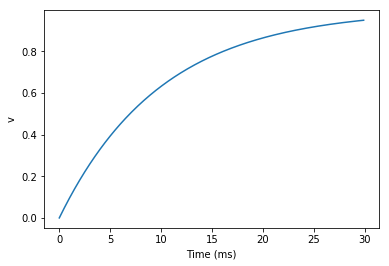

In [9]:
start_scope()
G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)
run(30 * ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

#### Generating spikes

To make our model fire spikes, we need to specify a threshold and a reset rule. These are supplied to the `NeuronGroup` function as additional arguments. We also need to specify an additional monitor to record spike times.

spike times: [ 16.   32.1  48.2] ms


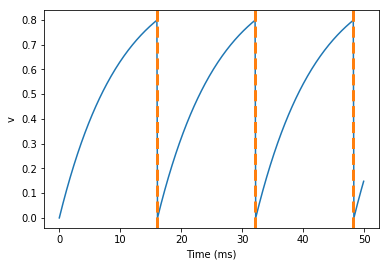

In [19]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')
statemon = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

print("spike times:", spikemon.t[:])

#### Time-varying driving current

Let's see if we can simulate the response to an increasing ramp current. We can also specify parameters that change as a function of time:

In [32]:
start_scope()
tau = 10*ms
slope = 0.01 / ms

eqs = '''
dv/dt = (I-v)/tau : 1
I = slope * t : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='euler')
M = StateMonitor(G, variables=True, record=True)

run(200 * ms)

Text(0.5,0,'Time (ms)')

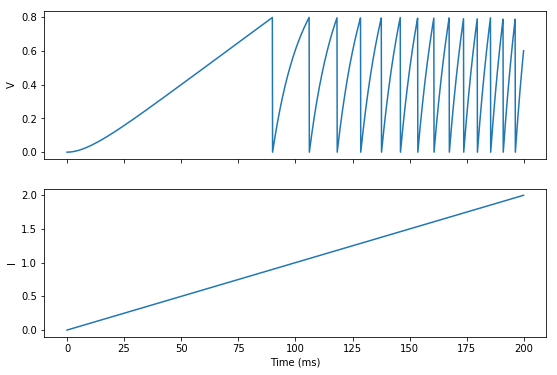

In [33]:
fig, axes = subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 6))
axes[0].plot(M.t/ms, M.v[0])
axes[1].plot(M.t/ms, M.I[0])
axes[0].set_ylabel('V')
axes[1].set_ylabel('I')
axes[1].set_xlabel("Time (ms)")

## Quadratic Integrate and Fire

Now let's simulate a QIF model. This is still a 1-D system, but the differential equation has changed. Also, because this model is capable of spiking (rather than us imputing a spike when the voltage crosses a threshold), we set the threshold much higher.

Text(0.5,0,'Time (ms)')

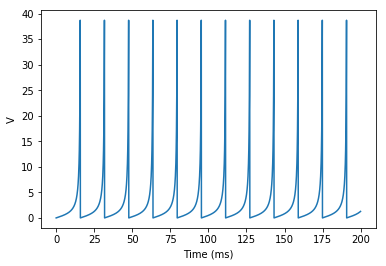

In [49]:
start_scope()
tau = 10*ms
I = 1

eqs = '''
dv/dt = (I + v**2)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>40', reset='v = 0', method='euler')
M = StateMonitor(G, variables=True, record=True)

run(200 * ms)
plot(M.t/ms, M.v[0])
ylabel('V')
xlabel("Time (ms)")

## Exercise 1

Adjust the parameter values for the QIF model to place it in each of the possible modes shown in this bifurcation plot:

<img src="images/l12_i8.3.png" alt="QIF bifurcations" style="width: 400px;"/>

Note that $b$ in the figure corresponds to the `I` parameter in our model. Copy the cell below as needed to run the simulations for each condition, adjusting `I` and `reset`. For the excitable and bistable conditions, you'll need to adjust `G.v` as well.

Text(0.5,0,'Time (ms)')

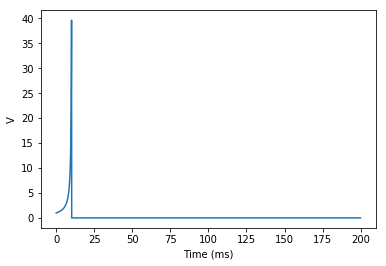

In [51]:
start_scope()
I = 0
G = NeuronGroup(1, eqs, threshold='v>40', reset='v = 0', method='euler')
M = StateMonitor(G, variables=True, record=True)

G.v = 1
run(200 * ms)
plot(M.t/ms, M.v[0])
ylabel('V')
xlabel("Time (ms)")

### Izhikevich model

To implement the Izhikevich model, we need to add an additional state variable, $u$.

\begin{align}
\dot{v} & = I + v^2 - u \quad &\mathrm{if} \; v \geq v_\mathrm{reset}, \\
\dot{u} & = a(bv - u) \quad & v \rightarrow c, u \rightarrow u + d
\end{align}

We're going to use an alternate form that allows us to separately specify the resting potential and threshold:

\begin{align}
C\dot{v} & = k(v - v_\mathrm{rest})(v - v_\mathrm{thresh}) - u + I\quad &\mathrm{if} \; v \geq v_\mathrm{reset}, \\
\dot{u} & = a(b(v - v_\mathrm{rest}) - u) \quad & v \rightarrow c, u \rightarrow u + d
\end{align}

Text(0.5,0,'Time (ms)')

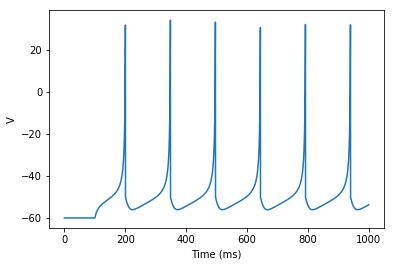

In [63]:
start_scope()
# from Izhikevich (2006) Fig 8.6a
C  = 100 * ms
vr = -60
vt = -40
k  = 0.7
a  = 0.03 / ms
b  = -2
c  = -50
d  = 100
vpeak = 35
#I = 70

eqs = '''
dv/dt = (k * (v - vr) * (v - vt) - u + I)/C : 1
du/dt = a * (b * (v - vr) - u) : 1
I = (t > 100 * ms) * 70 : 1
'''

resetters = '''
v = c
u += d
'''

G = NeuronGroup(1, eqs, threshold='v>vpeak', reset=resetters, method='euler')
M = StateMonitor(G, variables=True, record=True)
G.v = vr

run(1000 * ms)
plot(M.t/ms, M.v[0])
ylabel('V')
xlabel("Time (ms)")

## Exercise 2

1. Draw or plot the phase portrait for the Izhikevich model using the parameter values above.

2. What kind of bifurcation does this particular set of parameter values produce as I is increased?

3. Find a new set of $a$ and $b$ values that will alter the intersection of the $u$ and $v$ nullclines (i.e. change the number of intersections from 1 to 2 or vice versa). What kind of bifurcation should the system exhibit now?

4. Copy the simulation code from above and paste it below this cell, setting the values of $a$ and $b$ accordingly and test if your prediction is correct.

## Exercise 3

Copy the simulation code from above and adjust the parameters to make the model burst (i.e. fire a series of closely spaced spikes and then stop for some period of time).